In [30]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [31]:
all_df = pd.read_csv("bank.csv")

In [32]:
cols=['age','balance' ,'day', 'duration',
       'campaign','pdays','previous','deposit']
all_df=all_df[cols]

In [33]:
all_df['deposit']= all_df['deposit'].map({'no':0, 'yes': 1}).astype(int) 

In [34]:
X=all_df.drop(['deposit'], axis=1).values.astype('float64')

In [35]:
Y = all_df['deposit'].values.astype('int64')

In [36]:
X.shape

(11162, 7)

In [37]:
X[:5]

array([[ 5.900e+01,  2.343e+03,  5.000e+00,  1.042e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.600e+01,  4.500e+01,  5.000e+00,  1.467e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 4.100e+01,  1.270e+03,  5.000e+00,  1.389e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.500e+01,  2.476e+03,  5.000e+00,  5.790e+02,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.400e+01,  1.840e+02,  5.000e+00,  6.730e+02,  2.000e+00,
        -1.000e+00,  0.000e+00]])

In [38]:
Y[:5]

array([1, 1, 1, 1, 1])

In [39]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 

In [40]:
train_Features[355:359]

array([[-0.6070719 , -0.2751828 ,  0.04061153,  0.27370403, -0.55416834,
        -0.48118405, -0.36325984],
       [ 0.48418803, -0.54802828, -1.02822609,  1.73144326,  0.18059759,
        -0.48118405, -0.36325984],
       [-0.85890111,  0.13966633, -1.14698582,  2.39981382, -0.55416834,
        -0.48118405, -0.36325984],
       [-0.27129961, -0.12356754, -1.38450529, -0.79511268, -0.18678537,
         0.42913223,  0.0730585 ]])

In [41]:
train_Label[:4]

array([1, 0, 1, 0])

In [42]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [43]:
model = Sequential()

In [44]:
model.add(Dense(units=21*6,   input_dim=7,
                kernel_initializer='uniform', 
                activation='relu'))

In [45]:
model.add(Dense(units=21*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [46]:
model.add(Dense(units=21*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [47]:
model.add(Dense(units=21*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [48]:
model.add(Dense(units=21*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [49]:
model.add(Dense(units=21, 
                kernel_initializer='uniform', 
                activation='relu'))

In [50]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 126)               1008      
_________________________________________________________________
dense_9 (Dense)              (None, 105)               13335     
_________________________________________________________________
dense_10 (Dense)             (None, 84)                8904      
_________________________________________________________________
dense_11 (Dense)             (None, 63)                5355      
_________________________________________________________________
dense_12 (Dense)             (None, 42)                2688      
_________________________________________________________________
dense_13 (Dense)             (None, 21)                903       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 22        
Total para

In [52]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [53]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.33, 
                         epochs=30, 
                         batch_size=30,verbose=1,callbacks=[early_stopping])

Train on 5982 samples, validate on 2947 samples
Epoch 1/30
5982/5982 [==============================] - 2s 300us/step - loss: 0.5898 - acc: 0.6617 - val_loss: 0.5069 - val_acc: 0.7635
Epoch 2/30
5982/5982 [==============================] - 1s 174us/step - loss: 0.4897 - acc: 0.7723 - val_loss: 0.4941 - val_acc: 0.7730
Epoch 3/30
5982/5982 [==============================] - 1s 175us/step - loss: 0.4831 - acc: 0.7782 - val_loss: 0.4758 - val_acc: 0.7777
Epoch 4/30
5982/5982 [==============================] - 1s 175us/step - loss: 0.4773 - acc: 0.7850 - val_loss: 0.4849 - val_acc: 0.7760
Epoch 5/30
5982/5982 [==============================] - 1s 180us/step - loss: 0.4737 - acc: 0.7874 - val_loss: 0.4745 - val_acc: 0.7822
Epoch 6/30
5982/5982 [==============================] - 1s 174us/step - loss: 0.4729 - acc: 0.7862 - val_loss: 0.4822 - val_acc: 0.7682
Epoch 7/30
5982/5982 [==============================] - 1s 183us/step - loss: 0.4704 - acc: 0.7857 - val_loss: 0.4749 - val_acc: 0.7832


In [54]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

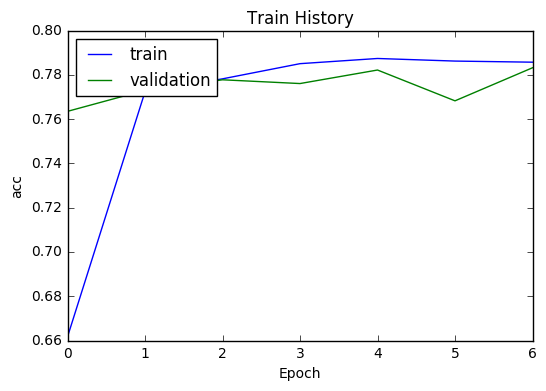

In [55]:
show_train_history(train_history,'acc','val_acc')

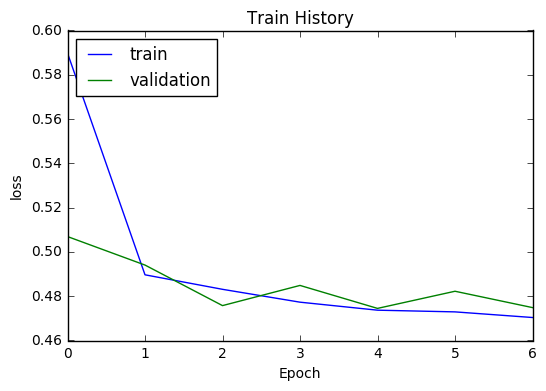

In [56]:
show_train_history(train_history,'loss','val_loss')

In [57]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

2233/2233 [==============================] - 0s 94us/step


In [58]:
scores[1]

0.7966860726816046